<a href="https://colab.research.google.com/github/szh141/colab/blob/main/CNN_on_sobel_h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
The simplest CNN, I2K 2020, Juan Nunez-Iglesias, Nicholas Sofroniew

In [8]:
from skimage import data,filters,util
import numpy as np
from matplotlib import pyplot as plt

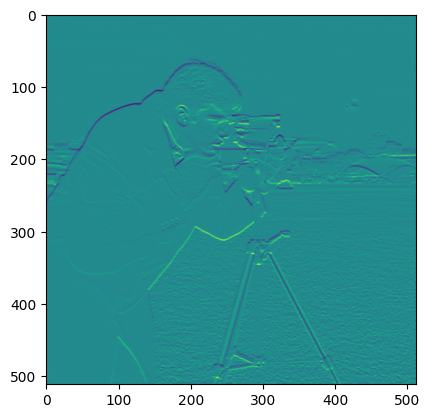

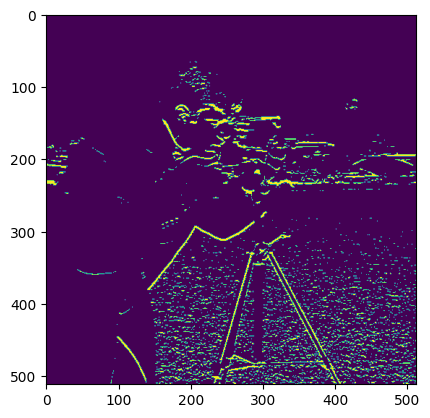

In [5]:
img = data.camera()
img_filtered = filters.sobel_h(img)
plt.imshow(img_filtered)
plt.show()
target = img_filtered>0.07
plt.imshow(target)

Text(0.5, 1.0, 'target')

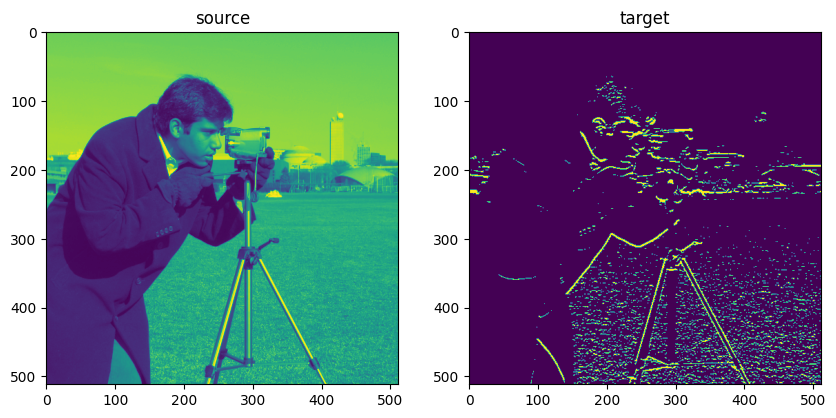

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img)
ax[0].set_title('source')
ax[1].imshow(target)
ax[1].set_title('target')

In [ ]:
test_2D = np.arange(25).reshape((5,5))
kernel_view = util.view_as_windows(test_2D,(2,2))
kernel_view # out put 4x4

In [22]:
a1 = np.arange(4).reshape((2,2))
a2 = a1
print(a1@a2) # @ operator for np.matmul or matrix multiplication
print(a1*a2) # element-wise multiplication
print(np.dot(a1,a2)) # Pearson's coeff, masked non-zero pixel.reshape(-1) for vector dot product

[[ 2  3]
 [ 6 11]]
[[0 1]
 [4 9]]
[[ 2  3]
 [ 6 11]]


In [23]:
windowed_img = util.view_as_windows(img,(3,3))
print(img.shape)
print(windowed_img.shape)

(512, 512)
(510, 510, 3, 3)


In [24]:
target_cropped = target[1:-1,1:-1]
target_cropped.shape

(510, 510)

reshape the windowed_img to 9 feature columns for sklearn training

In [35]:
X = windowed_img.reshape(510*510,3*3)
y = target_cropped.reshape(510*510)

In [43]:
#pip install -U scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [42]:
X.shape

(260100, 9)

In [61]:
print(model.coef_)
print(model.coef_.reshape(3,3))
#[[-1,-2,-1],
  [ 0, 0, 0],
  [ 1, 2, 1]]

[[-3.078e-01 -6.187e-01 -3.090e-01 -4.830e-04 -6.395e-04  3.427e-04
   3.077e-01  6.174e-01  3.069e-01]]
[[-3.078e-01 -6.187e-01 -3.090e-01]
 [-4.830e-04 -6.395e-04  3.427e-04]
 [ 3.077e-01  6.174e-01  3.069e-01]]
